<a href="https://colab.research.google.com/github/AadarshPandey29/Netflix-Movies-and-TV-Shows-Clustering-Analysis/blob/main/Netflix_Movies_and_TV_Shows_Clustering_(Capstone_4).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Problem Statement**

This dataset consists of tv shows and movies available on Netflix as of 2019. The dataset is collected from Flixable which is a third-party Netflix search engine.

In 2018, they released an interesting report which shows that the number of TV shows on Netflix has nearly tripled since 2010. The streaming service’s number of movies has decreased by more than 2,000 titles since 2010, while its number of TV shows has nearly tripled. It will be interesting to explore what all other insights can be obtained from the same dataset.

Integrating this dataset with other external datasets such as IMDB ratings, rotten tomatoes can also provide many interesting findings.

# **In this project, you are required to do**



1.   Exploratory Data Analysis

2.   Understanding what type content is available in different countries
3.   Is Netflix has increasingly focusing on TV rather than movies in recent years.
4. Clustering similar content by matching text-based features
 


# **Attribute Information**



1. show_id : Unique ID for every Movie / Tv Show

2. type : Identifier - A Movie or TV Show

3. title : Title of the Movie / Tv Show

4. director : Director of the Movie

5. cast : Actors involved in the movie / show

6. country : Country where the movie / show was produced

7. date_added : Date it was added on Netflix

8. release_year : Actual Releaseyear of the movie / show

9. rating : TV Rating of the movie / show

10. duration : Total Duration - in minutes or number of seasons

11. listed_in : Genere

12. description: The Summary description



# **Importing all the Dependencies**

In [150]:
# Importing the Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as mtick
from matplotlib.pyplot import figure
import plotly.graph_objects as go
import plotly.offline as py
import plotly.express as px
import datetime as dt
import missingno as msno


import warnings 
warnings.filterwarnings('ignore')

In [151]:
!pip install yellowbrick

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [152]:
!pip install -U kaleido

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [153]:
import os
if not os.path.exists("images"):
    os.mkdir("images")

In [154]:
# Loading the dataset and getting the 1st overview of the data
netflix_df = pd.read_csv("/content/drive/MyDrive/Datasets/NETFLIX MOVIES AND TV SHOWS CLUSTERING.csv")
netflix_df

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...
...,...,...,...,...,...,...,...,...,...,...,...,...
7782,s7783,Movie,Zozo,Josef Fares,"Imad Creidi, Antoinette Turk, Elias Gergi, Car...","Sweden, Czech Republic, United Kingdom, Denmar...","October 19, 2020",2005,TV-MA,99 min,"Dramas, International Movies",When Lebanon's Civil War deprives Zozo of his ...
7783,s7784,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...
7784,s7785,Movie,Zulu Man in Japan,NaN,Nasty C,NaN,"September 25, 2020",2019,TV-MA,44 min,"Documentaries, International Movies, Music & M...","In this documentary, South African rapper Nast..."
7785,s7786,TV Show,Zumbo's Just Desserts,NaN,"Adriano Zumbo, Rachel Khoo",Australia,"October 31, 2020",2019,TV-PG,1 Season,"International TV Shows, Reality TV",Dessert wizard Adriano Zumbo looks for the nex...


In [155]:
# Getting the 1st 5 rows of the data.
netflix_df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


In [156]:
# Getting the last 5 rows of the data.
netflix_df.tail()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
7782,s7783,Movie,Zozo,Josef Fares,"Imad Creidi, Antoinette Turk, Elias Gergi, Car...","Sweden, Czech Republic, United Kingdom, Denmar...","October 19, 2020",2005,TV-MA,99 min,"Dramas, International Movies",When Lebanon's Civil War deprives Zozo of his ...
7783,s7784,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...
7784,s7785,Movie,Zulu Man in Japan,NaN,Nasty C,NaN,"September 25, 2020",2019,TV-MA,44 min,"Documentaries, International Movies, Music & M...","In this documentary, South African rapper Nast..."
7785,s7786,TV Show,Zumbo's Just Desserts,NaN,"Adriano Zumbo, Rachel Khoo",Australia,"October 31, 2020",2019,TV-PG,1 Season,"International TV Shows, Reality TV",Dessert wizard Adriano Zumbo looks for the nex...
7786,s7787,Movie,ZZ TOP: THAT LITTLE OL' BAND FROM TEXAS,Sam Dunn,NaN,"United Kingdom, Canada, United States","March 1, 2020",2019,TV-MA,90 min,"Documentaries, Music & Musicals",This documentary delves into the mystique behi...


In [157]:
# Checking for the number of rows and columns present in the data.
netflix_df.shape

(7787, 12)

There are total 7787 number of rows and 12 Columns present in the dataset.

In [158]:
# Displaying the column names.
netflix_df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [159]:
# Getting some information on our dataset.
netflix_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


As the information displayed above we can see that there is only one column with integer datatype, but the important thing is we have got some null values in the dataset. Also we have to check for the duplicate values.

# **Data Processing**

In [160]:
# checking for the duplicate values first.
netflix_df[netflix_df.duplicated()]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description


There is no duplicate values in our dataset which makes the work easy. 

# **Checking for Null Values**

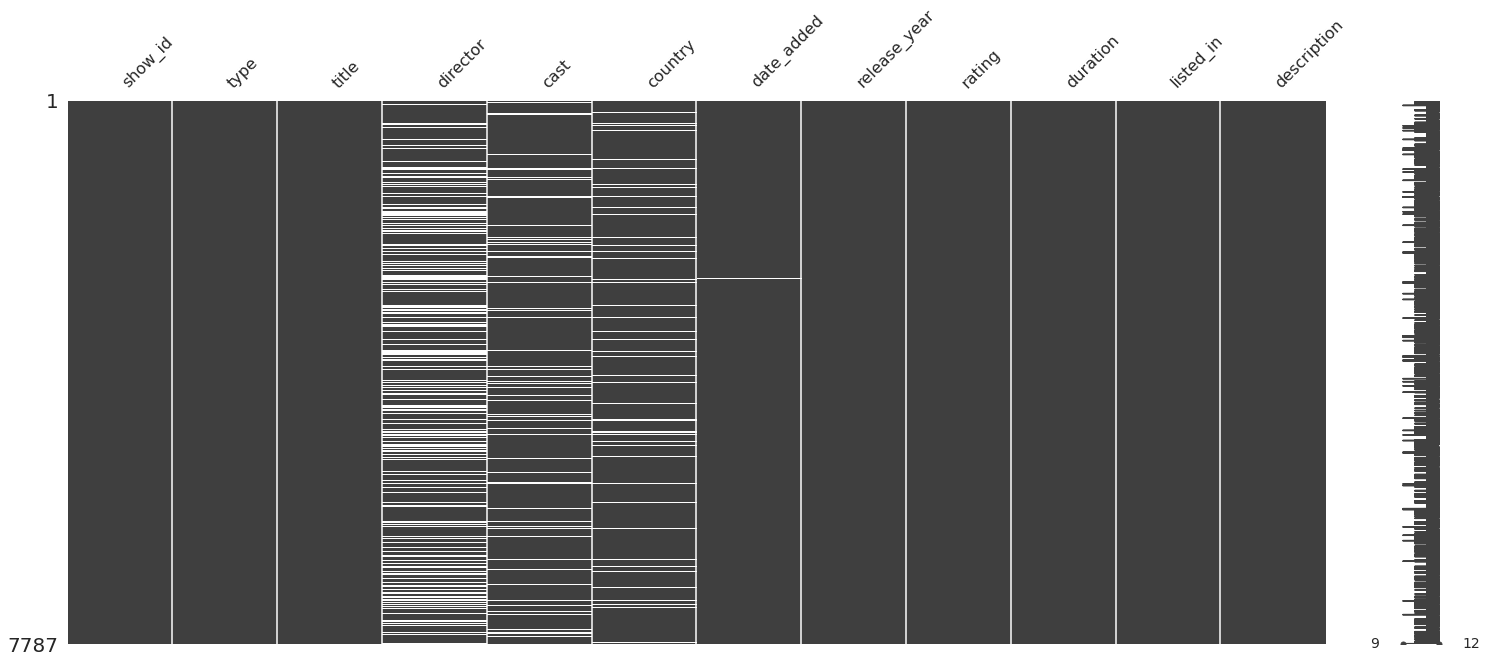

In [161]:
# Visualizing missing values as a matrix.
msno.matrix(netflix_df)

The white patches in between the matrix is due to null values in that particular columns.

Also using this matrix we can find the pattern or missingness in the dataset. From this we can say that director column has the different pattern for null values and cast also has the peculiar pattern of missingness of the value from the dataset whereas date_added shows different pattern.

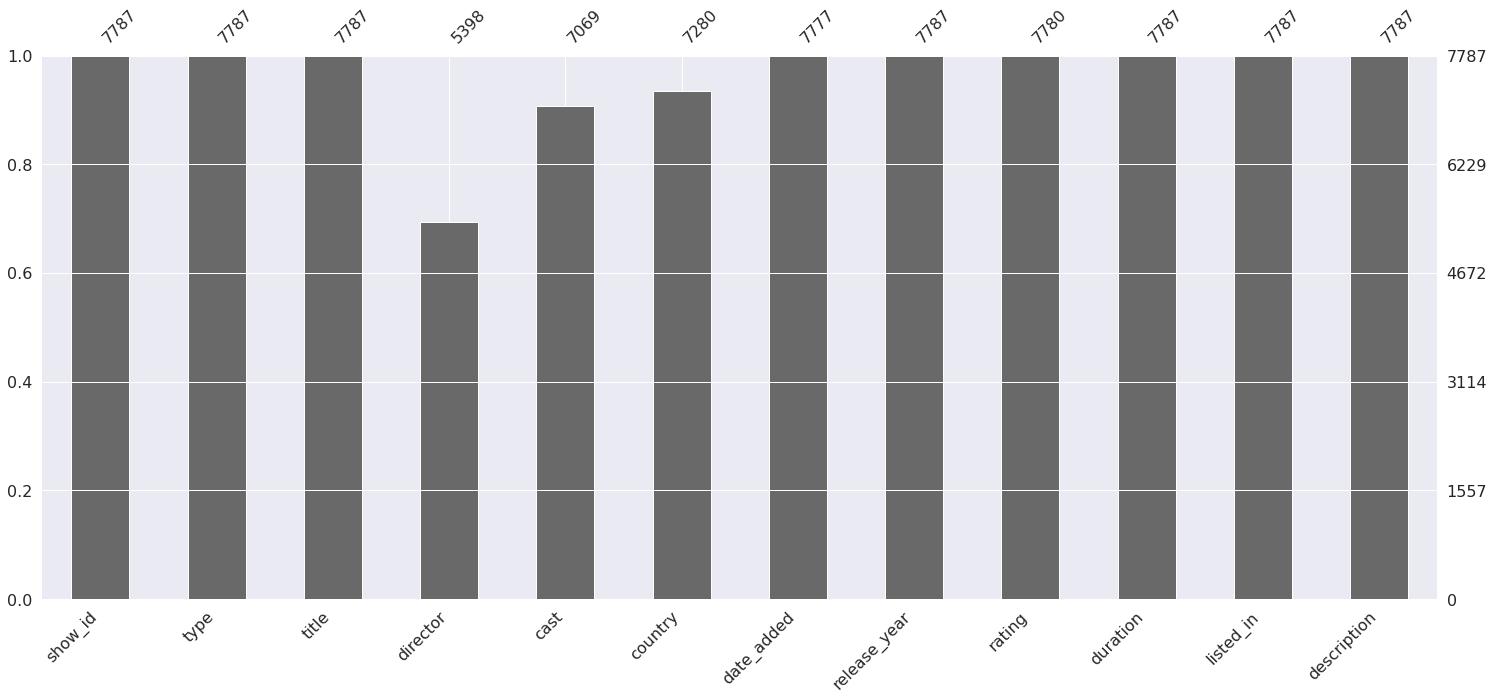

In [162]:
# Bar graph for the null values in the data.
msno.bar(netflix_df)

Purpose for displaying this graph is for getting the precise look on the null values in the data, thus we can clearly see the null values in the data with there number. This gives the better knowledge of the null values.

In [163]:
# Digitally displaying for the null values in the dataset.
netflix_df.isnull().sum()

show_id            0
type               0
title              0
director        2389
cast             718
country          507
date_added        10
release_year       0
rating             7
duration           0
listed_in          0
description        0
dtype: int64

We have got **Directors** with **2389** **null values** in it then **cast** with **718** **null values** and **country** with **507** **null values** in it, also we have **date_added** and **rating** with **10** and **7** **null values** in it.

In [164]:
# Total number of null values 
netflix_df.isnull().sum().sum()

3631

This says there are total **3671 null values** in the data.

**Handling the Null Values**

In [165]:
# Replacing the null values in director column
netflix_df['director'].replace(np.nan, 'unknown', inplace = True)

# Checking for the null values in director column
netflix_df['director'].isnull().sum()

0

In [166]:
# Replacing the null values in cast column
netflix_df['cast'].replace(np.nan, 'unknown', inplace = True)

# Checking for the null values in cast column
netflix_df['cast'].isnull().sum()

0

In [167]:
# Replacing the null values in country column
netflix_df['country'].fillna(netflix_df['country'].mode()[0], inplace = True)

# Checking for the null values in cast column
netflix_df['country'].isnull().sum()

0

In [168]:
# Replacing the null values in rating column
netflix_df['rating'].fillna(netflix_df['rating'].mode()[0], inplace = True)

# Checking for the null values in cast column
netflix_df['rating'].isnull().sum()

0

**Since there is very few entries in the date_added column hence decided to drop it.**

In [169]:
#  Droping the null values in the date_added column.
netflix_df.dropna(inplace = True)

In [170]:
# Now checking for the null values in the dataset.
netflix_df.isnull().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

Now there is no column left with the null values.

In [171]:
# Create new features to store date, day, month and year seperately.
netflix_df["date_added"] = pd.to_datetime(netflix_df['date_added'])  # First convert date_added to date time format.
netflix_df['day_added'] = netflix_df['date_added'].dt.day            # Compute day.
netflix_df['year_added'] = netflix_df['date_added'].dt.year          # Compute year.
netflix_df['month_added'] = netflix_df['date_added'].dt.month

# **Exploratory Data Analysis**

In [172]:
# Getting the values in Country
netflix_df.country.value_counts()

United States                                                   3055
India                                                            923
United Kingdom                                                   396
Japan                                                            225
South Korea                                                      183
                                                                ... 
Russia, United States, China                                       1
Italy, Switzerland, France, Germany                                1
United States, United Kingdom, Canada                              1
United States, United Kingdom, Japan                               1
Sweden, Czech Republic, United Kingdom, Denmark, Netherlands       1
Name: country, Length: 681, dtype: int64

In [173]:
# Getting the values in listed in
netflix_df.listed_in.value_counts()

Documentaries                                                                      334
Stand-Up Comedy                                                                    321
Dramas, International Movies                                                       320
Comedies, Dramas, International Movies                                             243
Dramas, Independent Movies, International Movies                                   215
                                                                                  ... 
Anime Series, Crime TV Shows, TV Thrillers                                           1
Crime TV Shows, Romantic TV Shows, Spanish-Language TV Shows                         1
Crime TV Shows, International TV Shows, Reality TV                                   1
International Movies, Romantic Movies, Sci-Fi & Fantasy                              1
International TV Shows, Spanish-Language TV Shows, Stand-Up Comedy & Talk Shows      1
Name: listed_in, Length: 491, dtype: int64




*   There are some movies / TV shows that were filmed in multiple countries, have multiple genres associated with it.

*   To simplify the analysis, let's consider only the primary country where that respective movie / TV show was filmed.

*   Also, let's consider only the primary genre of the respective movie / TV show.





In [174]:
# Choosing the primary country and primary genre to simplify the analysis
netflix_df['country'] = netflix_df['country'].apply(lambda x: x.split(',')[0])
netflix_df['listed_in'] = netflix_df['listed_in'].apply(lambda x: x.split(',')[0])

In [175]:
# contry in which a movie was produced
netflix_df.country.value_counts()

United States     3383
India              956
United Kingdom     576
Canada             259
Japan              236
                  ... 
Zimbabwe             1
Namibia              1
Soviet Union         1
Iran                 1
Somalia              1
Name: country, Length: 81, dtype: int64

By this we can see that **United States** has the highest number of flim produced which **3383** followed by **India** with **956**.

In [176]:
# genre of shows
netflix_df.listed_in.value_counts()

Dramas                          1384
Comedies                        1074
Documentaries                    751
Action & Adventure               721
International TV Shows           689
Children & Family Movies         502
Crime TV Shows                   369
Kids' TV                         357
Stand-Up Comedy                  321
Horror Movies                    244
British TV Shows                 231
Docuseries                       193
Anime Series                     147
International Movies             114
TV Comedies                      109
Reality TV                       102
Classic Movies                    77
TV Dramas                         62
Movies                            56
Thrillers                         49
TV Action & Adventure             36
Stand-Up Comedy & Talk Shows      33
Romantic TV Shows                 28
Independent Movies                20
Anime Features                    19
Classic & Cult TV                 19
Music & Musicals                  17
T

Followed by this above list we get that most of the movies or tv shows have the genre of Dramas and Comedies. 

**Analysing the type of content available in Netflix.** 

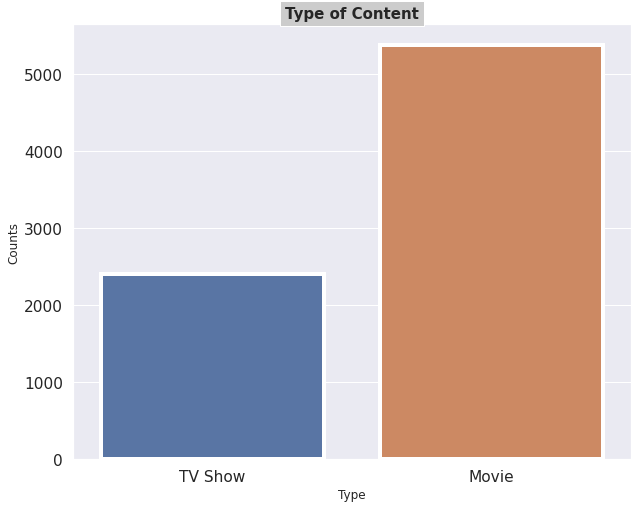

In [177]:
# Plotting the countplot
plt.figure(figsize=(10,8))
ax=sns.countplot('type',data=netflix_df,lw=4, ec='white',)
plt.title('Type of Content', fontsize=15,fontweight='bold',
          bbox={'facecolor':'0.8', 'pad':5},)
plt.xlabel('Type',fontsize=12)
plt.ylabel('Counts',fontsize=12)
plt.show()

According to above graph, content provided by netflix is more Movies compare to TV Show.

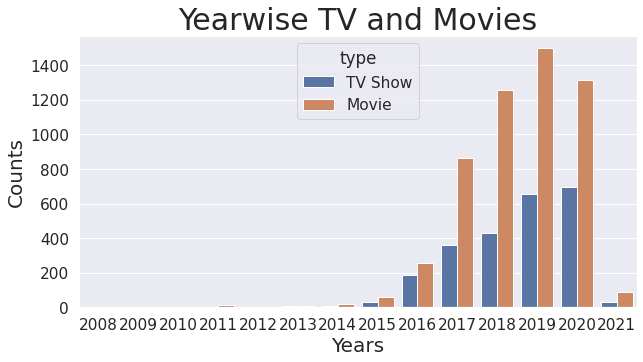

In [178]:
# Getting the graph for yearwise TV and Movies.
plt.figure(figsize=(10,5))
sns.countplot(x='year_added', hue = 'type',data=netflix_df)
plt.xlabel('Years', fontsize = 20)
plt.ylabel('Counts', fontsize = 20)
plt.title('Yearwise TV and Movies', fontsize = 30)
plt.show()

* TV Shows are less compare to Movies and in every year.

* By this we can also say that count of TV Shows and Movies has increased but they certainly decreased in 2021.

* 2019 was the year which has the highest number of Movies.

* 2020 was the year which has the highest number of TV Shows.


In [179]:
# Age ratings
netflix_df.rating.unique()

array(['TV-MA', 'R', 'PG-13', 'TV-14', 'TV-PG', 'NR', 'TV-G', 'TV-Y',
       'TV-Y7', 'PG', 'G', 'NC-17', 'TV-Y7-FV', 'UR'], dtype=object)

In [180]:
# Changing the values in the rating column
rating_map = {'TV-MA':'Adults',
              'R':'Adults',
              'PG-13':'Teens',
              'TV-14':'Young Adults',
              'TV-PG':'Older Kids',
              'NR':'Adults',
              'TV-G':'Kids',
              'TV-Y':'Kids',
              'TV-Y7':'Older Kids',
              'PG':'Older Kids',
              'G':'Kids',
              'NC-17':'Adults',
              'TV-Y7-FV':'Older Kids',
              'UR':'Adults'}

netflix_df['rating'].replace(rating_map, inplace = True)
netflix_df['rating'].unique()

array(['Adults', 'Teens', 'Young Adults', 'Older Kids', 'Kids'],
      dtype=object)

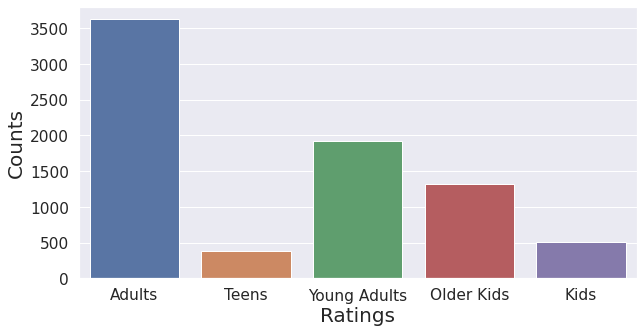

In [181]:
# Age ratings for shows in the dataset
plt.figure(figsize=(10,5))
sns.countplot(x='rating',data=netflix_df)
plt.xlabel("Ratings", fontsize = 20)
plt.ylabel("Counts", fontsize = 20)
plt.show()

**Highest number of shows produced is for Adults followed by Young Adults and then Older Kids and Kids. The lowest number of shows are produced for Teens.**

In [182]:
#creating two extra columns
tv_shows=netflix_df[netflix_df['type']=='TV Show']
movies=netflix_df[netflix_df['type']=='Movie']

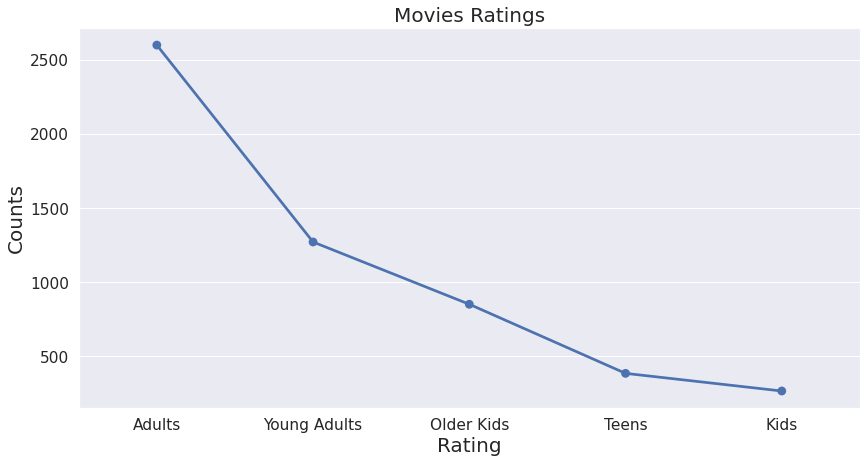

In [183]:
#Rating based on rating system of all Movies
movies_ratings = movies.groupby(['rating'])['show_id'].count().reset_index(name='count').sort_values(by='count',ascending=False)
fig_dims = (14,7)
fig, ax = plt.subplots(figsize=fig_dims)  
sns.pointplot(x='rating',y='count',data=movies_ratings)
plt.xlabel('Rating', fontsize = 20)
plt.ylabel('Counts', fontsize = 20)
plt.title('Movies Ratings',size='20')
plt.show()

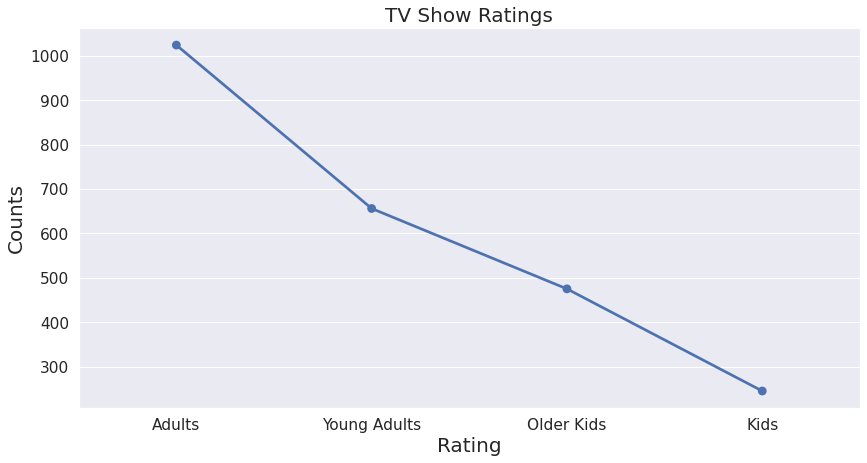

In [184]:
#Rating based on rating system of all TV Shows
tv_ratings = tv_shows.groupby(['rating'])['show_id'].count().reset_index(name='count').sort_values(by='count',ascending=False)
fig_dims = (14,7)
fig, ax = plt.subplots(figsize=fig_dims)  
sns.pointplot(x='rating',y='count',data=tv_ratings)
plt.xlabel('Rating', fontsize = 20)
plt.ylabel('Counts', fontsize = 20)
plt.title('TV Show Ratings',size='20')
plt.show()

In [185]:
# Sorting the release date of movies
movies_year =movies['release_year'].value_counts().sort_index(ascending=False)

Sorting the Movies release dates.

In [186]:
# printing the release dates of the movies
movies_year

2021     12
2020    411
2019    582
2018    734
2017    744
       ... 
1946      1
1945      3
1944      3
1943      3
1942      2
Name: release_year, Length: 72, dtype: int64

In [187]:
# Sorting the release date of TV Shows
tvshows_year =tv_shows['release_year'].value_counts().sort_index(ascending=False)

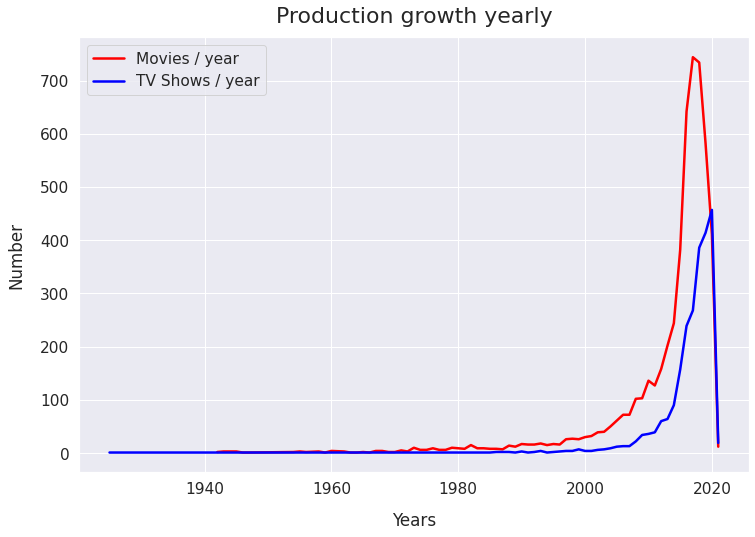

In [188]:
# visualizing the movies and tv_shows based on the release year
sns.set(font_scale=1.4)
movies_year.plot(figsize=(12, 8), linewidth=2.5, color='red',label="Movies / year",ms=3)
tvshows_year.plot(figsize=(12, 8), linewidth=2.5, color='blue',label="TV Shows / year")
plt.xlabel("Years", labelpad=15)
plt.ylabel("Number", labelpad=15)
plt.legend()
plt.title("Production growth yearly", y=1.02, fontsize=22);

We can see that Movies has the high production growth as Compare to TV Shows, but we can also obeserve that before 2000 the growth of both the categories Movies and TV Shows was very less.

# **Univariate Analysis.**

Text(0.5, 1.0, 'Movies and TV Shows in the dataset.')

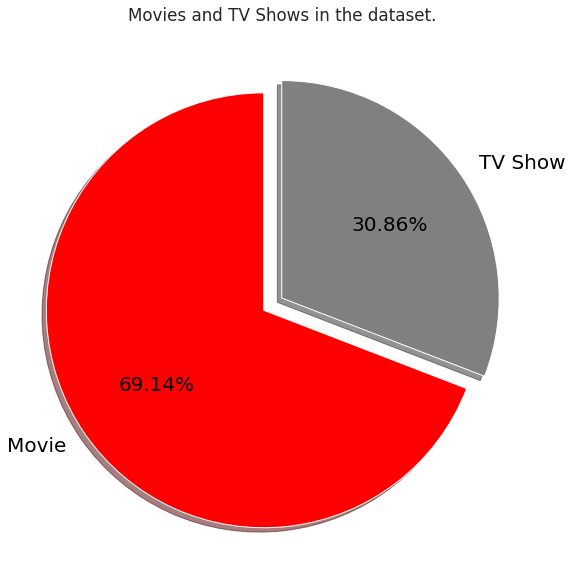

In [189]:
plt.figure(figsize = (10,10))
myexplode = [0.1, 0]
netflix_df.type.value_counts().plot(kind = 'pie', autopct = '%1.2f%%', labels = ['Movie', 'TV Show'], shadow = True, explode = myexplode, 
                                    startangle=90,textprops={'color':"black", 'fontsize': 20}, colors =['red','grey'])
plt.ylabel('')
plt.title('Movies and TV Shows in the dataset.')

According to this Pie Chart we get that there are high number of Movies(69.14%)  as compared to TV Shows(30.86%).

Text(0.5, 1.0, 'Top 10 directors by number of shows directed')

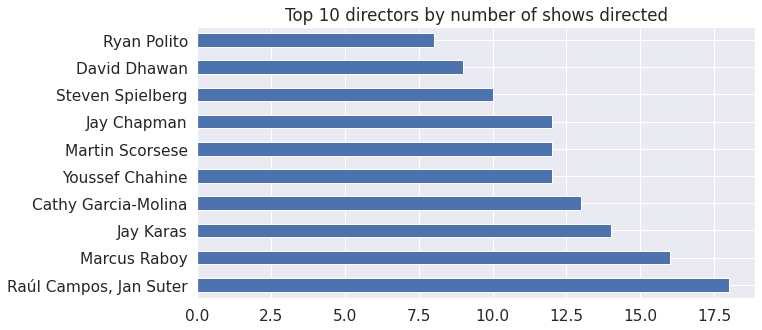

In [190]:
# Top 10 directors in the dataset
plt.figure(figsize=(10,5))
netflix_df[~(netflix_df['director']=='unknown')].director.value_counts().nlargest(10).plot(kind='barh')
plt.title('Top 10 directors by number of shows directed')

**Raul Campos and Jan Suter are the 2 directors who have directed around 18 movies and they have directed highest movies compare to any other directors.** 

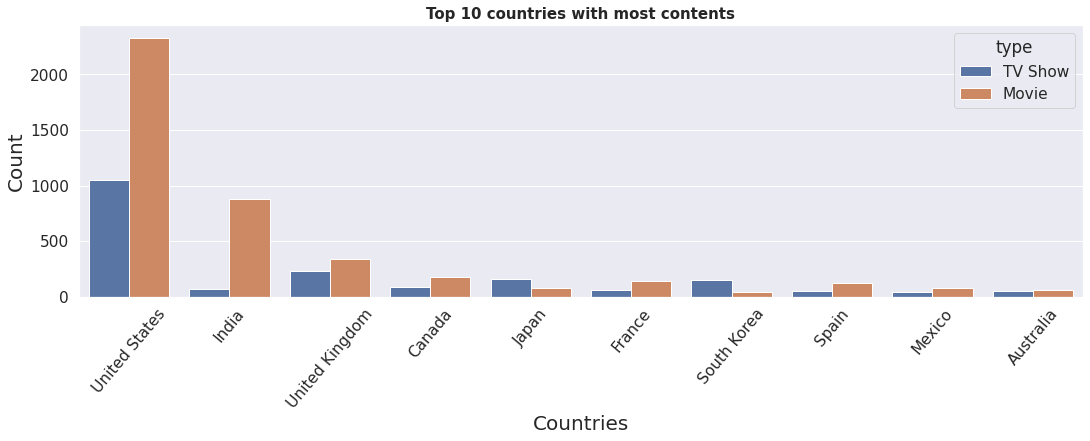

In [191]:
# Top 10 Countries with highest number of the movies.
plt.figure(figsize=(18,5))
sns.countplot(x=netflix_df['country'],order=netflix_df['country'].value_counts().index[0:10],hue=netflix_df['type'])
plt.xticks(rotation=50)
plt.xlabel('Countries', fontsize = 20)
plt.ylabel('Count', fontsize = 20)
plt.title('Top 10 countries with most contents', fontsize=15, fontweight='bold')
plt.show()

**By this graph we can easily conclude that United States is the country having the highest production of Movies and TVShow followed by India.**

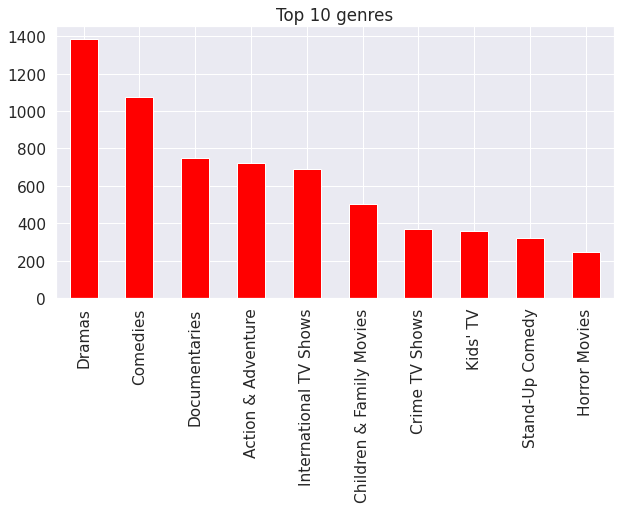

In [192]:
# Top 10 genres 
plt.figure(figsize=(10,5))
netflix_df.listed_in.value_counts().nlargest(10).plot(kind='bar', color = 'red')
plt.title('Top 10 genres')
plt.show()

By this we can say that Dramas is the most popular genre followed by Comedies.

In [193]:
# Getting the percentage value for Dramas genre
netflix_df.listed_in.value_counts().nlargest(3).sum()/len(netflix_df)*100

41.26269769834126

In [194]:
# Getting the percentage value for Dramas genre
netflix_df.listed_in.value_counts().nlargest(10).sum()/len(netflix_df)*100

82.44824482448246

* **These three genres account for about 41% of all movies and TV shows.**

* **This value increases to about 82% for top 10 genres.**

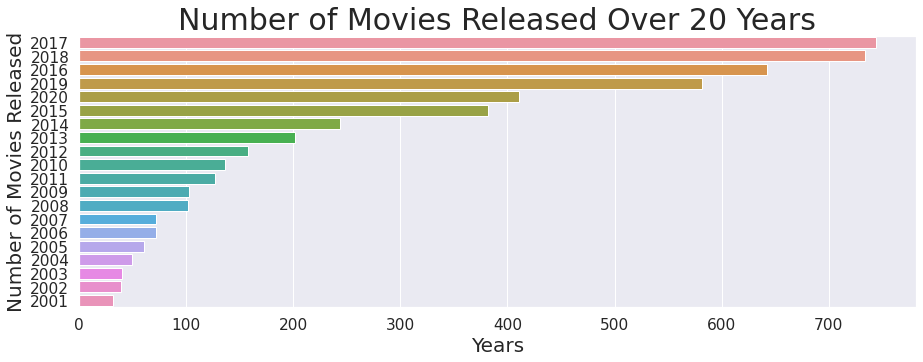

In [195]:
#Analysing how many movies released per year in last 20 years
plt.figure(figsize=(15,5))
sns.countplot(y=movies['release_year'],data=netflix_df,order=movies['release_year'].value_counts().index[0:20])
plt.xlabel('Years', fontsize = 20)
plt.ylabel('Number of Movies Released', fontsize = 20)
plt.title("Number of Movies Released Over 20 Years", fontsize = 30)
plt.show()

By this graph we can say that most of the Movies was released in 2017 followed by 2018 and 2016.

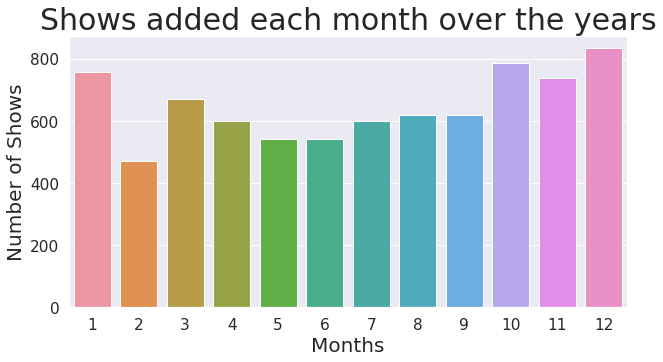

In [196]:
# Number of shows added on different months
plt.figure(figsize = (10,5)) 
sns.countplot(netflix_df['month_added'])
plt.title('Shows added each month over the years', fontsize = 30)
plt.xlabel('Months', fontsize = 20)
plt.ylabel('Number of Shows', fontsize = 20)
plt.show()

* There is highest number of release in December month(above 800).
* February has the lowest number of release(around 450). 

# **Top 10 Cast Involved either in Movies or TV Shows**

In [197]:
# Create a list of all the actors in the data
def data_into_list(data):
  actor_list = {}       # dict to store the count for each actors
  temp_list = []        # list to store all the names of actors
  cast_list = list(data['cast'])    #define the data we intend to use
  for i in range(len(cast_list)):
    temp_list.extend(str(cast_list[i]).split(','))
  for i in temp_list:
    if i not in actor_list:
      actor_list[i] = temp_list.count(i)
  return actor_list

In [198]:
# Creating the dataframe for list of actors
actor_list = pd.DataFrame([data_into_list(netflix_df)]).T.reset_index()
actor_list = actor_list.sort_values(0, ascending = False).drop(106) #dropped the nan values in the dataframe which was present at 106th index

In [199]:
# Top 10 Actors with highest number of movies and TV Shows.
actor_list = actor_list.head(10)
print(actor_list)

                  index   0
1296        Anupam Kher  38
194    Takahiro Sakurai  28
4041     Shah Rukh Khan  27
2205            Om Puri  27
742         Boman Irani  25
8464      Andrea Libman  24
2508       Paresh Rawal  24
4370          Yuki Kaji  23
2203       Akshay Kumar  22
4996       Vincent Tong  22


In [200]:
# Plot  for top 10  actors with highest number of content on the platform.
top_10_actors = actor_list.head(10)
top_10_actors.rename(columns={'index':'Actors name', 0:'Count'}, inplace=True)

fig = px.bar(top_10_actors, x='Actors name', y='Count', text_auto=True,
             color='Count', color_continuous_scale=['#363336', '#8C8C8C','#FF3030'])

fig.update_traces(textangle=0, cliponaxis=False)
fig.update_layout(
    title={
        'text': 'Actors with most content on platform.',
        'y':0.95,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'},
        autosize=False,
        width=1200,
        height=500)
# fig.show()
fig.show()

* Anupam Kher has the highest number of content on the platform.

* Vincent Tong has the lowest number of content on the platform.

# **Bivariate Analysis**

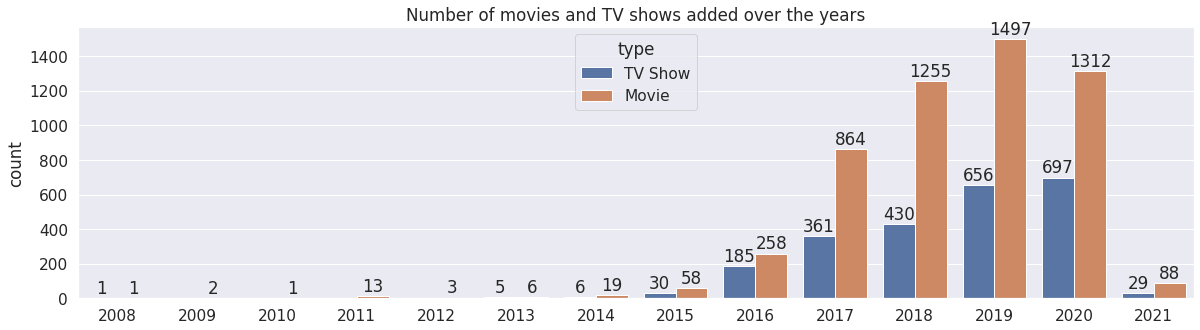

In [205]:
# Number of movies and TV shows added over the years
plt.figure(figsize=(20,5))
p = sns.countplot(x='year_added',data=netflix_df, hue='type')
plt.title('Number of movies and TV shows added over the years')
plt.xlabel('')
for i in p.patches:
  p.annotate(format(i.get_height(), '.0f'), (i.get_x() + i.get_width() / 2., i.get_height()), ha = 'center', va = 'center', xytext = (0, 10), 
             textcoords = 'offset points')

Total 1497 is the highest number of movies produced in 2019 and 697 is the highest number of TV Shows produced in 2020.